In [59]:
import networkx as nx

A = [2,3,4,6,8,12,16,20,60]

def divide(A):
    order = []
    for a in A:
        for b in A:
            if a//b == a/b:
                order.append((b,a))
            else:
                pass
    return order

            
poset = divide(A)

def check_minterm(element, poset):
    previous = []
    for order in poset:
        previous.append(not(order[1] == element and order[0] != element))
        
    return all(previous)
    
for a in A:
    print(a, check_minterm(a, poset))
    
    
def ordering(A, order):
    SP = A.copy()
    s = []
    while SP != []:
        minimal = [a for a in SP if check_minterm(a, order(SP)) == True][0]
        s.append(minimal)
        SP.remove(minimal)
        
    return [(s[i], s[i+1]) for i in range(len(s)-1)]

topological_poset = ordering(A, divide)
print(topological_poset)

2 True
3 True
4 False
6 False
8 False
12 False
16 False
20 False
60 False
[(2, 3), (3, 4), (4, 6), (6, 8), (8, 12), (12, 16), (16, 20), (20, 60)]


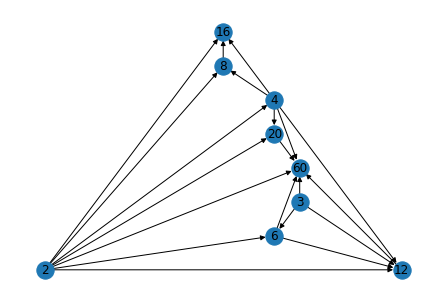

In [61]:
G = nx.DiGraph()
G.add_edges_from(poset)
nx.draw_planar(G, with_labels=True, directed=True)

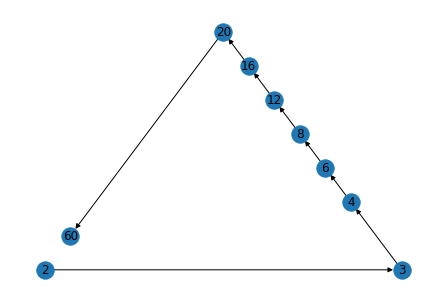

In [62]:
H = nx.DiGraph()
H.add_edges_from(topological_poset)
nx.draw_planar(H, with_labels=True, directed=True)